In [2]:
import re
import math

import nltk
from pymystem3 import Mystem

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [105]:
m = Mystem(end_of_sentence=True)
lit = 'alisa_ch02.txt'
tech = 'mediatext.txt'

In [106]:
def read_text(fname):
    _text = ''
    with open(fname) as fin:
        _text = fin.read()
    return _text

def get_stopwords():
    fname = 'stopwords/final.txt'
    with open(fname, 'r') as fin:
        _text = fin.read()
        _stopwords = _text.split('\n')
        _stopwords = [_s for _s in _stopwords if not _s.startswith('#')]
    return _stopwords

### Лексико-статистический анализ главы 2 книги Л. Кэрролла, "Приключения Алисы в стране чудес"

In [107]:
text = read_text(lit)
tokens = m.analyze(littext)

In [108]:
sentences = []
sentence = []
for t in tokens:
    if t['text'] == '\s':
        sentences.append(sentence)
        sentence = []
    if 'analysis' in t and t['analysis']:
        sentence.append(t)
avg_sentences = sum(len(t) for t in sentences) / len(sentences)

In [109]:
# Убираем все токены, которые не имеют морфологических данных
tokens = [l for l in tokens if 'analysis' in l and l['analysis']]

In [110]:
unique_words = set(t['text'].lower() for t in tokens)
unique_lexes = set(t['analysis'][0]['lex'].lower() for t in tokens)

print(
f"""
Общее число словоформ: {len(tokens)}
Число различных словоформ: {len(unique_words)}
Разнообразие словоформ текста: {len(unique_words) / len(tokens):.4f}

Число различных лексем: {len(unique_lexes)}
Разнообразие лексем: {len(unique_lexes) / len(tokens):.4f}

Количетво предложений: {len(sentences)}
Максимальная длина предложений: {max(len(t) for t in sentences)}
Минимальная длина предложений: {min(len(t) for t in sentences)}
Средняя длина предложения: {math.floor(avg_sentences)}
"""
)


Общее число словоформ: 1588
Число различных словоформ: 801
Разнообразие словоформ текста: 0.5044

Число различных лексем: 623
Разнообразие лексем: 0.3923

Количетво предложений: 108
Максимальная длина предложений: 93
Минимальная длина предложений: 2
Средняя длина предложения: 14



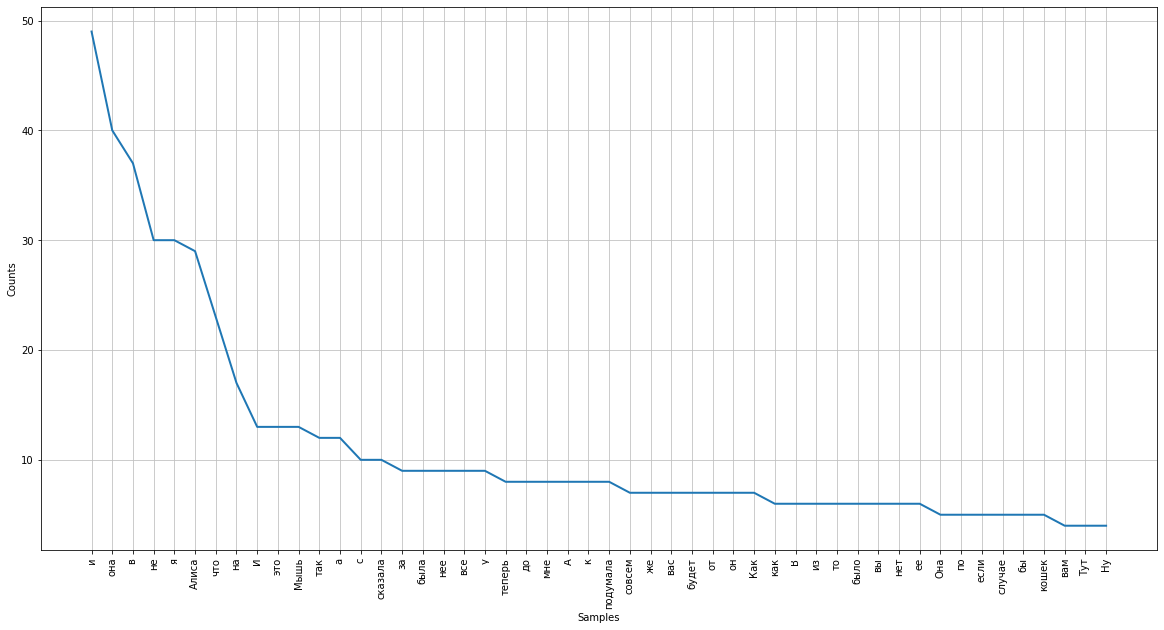

In [111]:
words = [t['text'] for t in tokens]
fdist = nltk.FreqDist(words)
_ = fdist.plot(50)

In [112]:
# список токенов без стопслов
stopwords = get_stopwords()
words_without_stopwords = [t['text'] for t in tokens if t['analysis'][0]['lex'].lower() not in stopwords]

In [113]:
fdist_stopwords = nltk.FreqDist(words_without_stopwords)
_ = fdist_stopwords.plot(50)

In [87]:
m2 = Mystem(disambiguation=False, weight=True, end_of_sentence=True)

In [114]:
tokens2 = m2.analyze(littext)
# Убираем все токены, которые не имеют морфологических данных
tokens2 = [t for t in tokens2 if 'analysis' in t and t['analysis']]
ambig_tokens = [t for t in tokens2 if len(t['analysis']) > 1]
ambig_words = [t['text'].lower() for t in ambig_tokens]
unique_ambig_words = set(t['text'].lower() for t in ambig_tokens)

In [115]:
print(f"""
Количество омонимичных слов: {len(ambig_tokens)}
Абсолютная частота омонимичных слов: {len(ambig_tokens) / len(tokens2):.4f}
Разнообразие омонимичных слов: {len(unique_ambig_words) / len(ambig_words):.4f}
""")


Количество омонимичных слов: 725
Абсолютная частота омонимичных слов: 0.4565
Разнообразие омонимичных слов: 0.3766



In [116]:
fdist_ambig = nltk.FreqDist(ambig_words)
_ = fdist_ambig.plot(50)

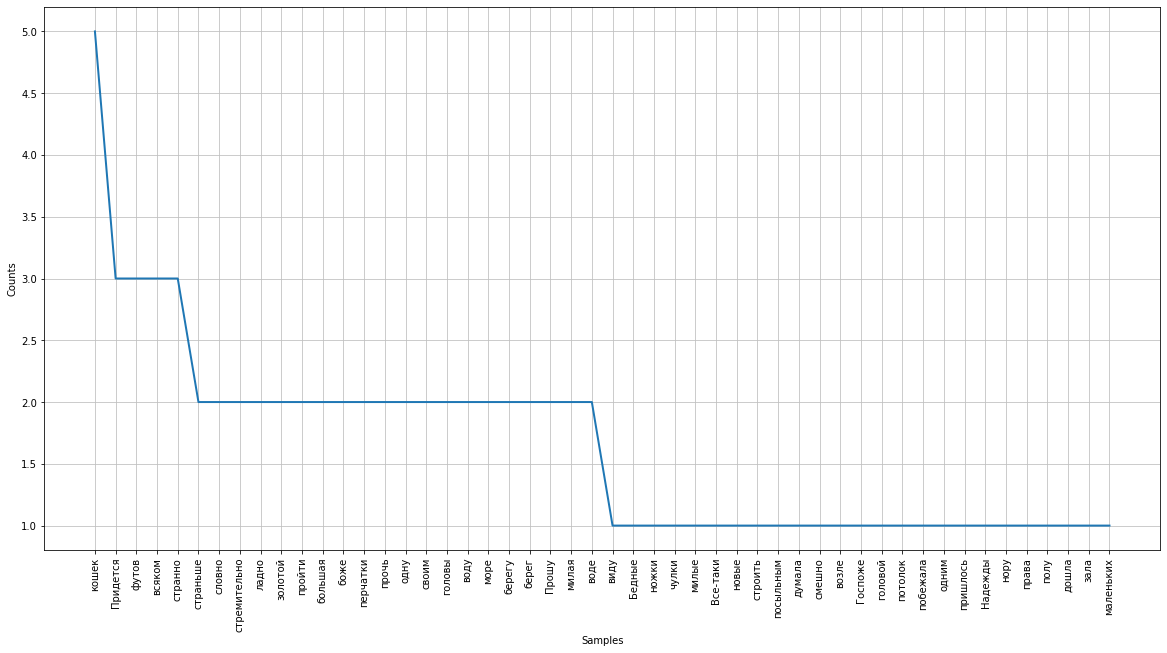

In [117]:
ambig_without_stopwords = [t['text'] for t in ambig_tokens if t['text'].lower() not in stopwords]
fdist_ambig = nltk.FreqDist(ambig_without_stopwords)
_ = fdist_ambig.plot(50)